# 1.Use MNIST dataset to train our model using handwritten recognition.

Make sure to install cv2 and tensorflow libraries before importing!!!

In [1]:
#Import all the libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# import our dataset using tensorflow
mnist = tf.keras.datasets.mnist

### Preprocessing

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [54]:
def createModel(hiddenLayers=[128, 128], dropoutRate=0, activation='relu', optimizer='adam',
                loss='sparse_categorical_crossentropy', metrics=['accuracy']):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(28, 28)))
    model.add(tf.keras.layers.Flatten())
    # Creating hidden layers
    for count in hiddenLayers:
        model.add(tf.keras.layers.Dense(count, activation=activation))
        model.add(tf.keras.layers.Dropout(dropoutRate))
    
    # Output layer with 10 neurons
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [60]:
# model = createModel()

# Works better on handwritten digits, but takes longer to train
model = createModel(hiddenLayers=[512, 256, 128, 64, 32, 16])

### Determine optimal hyperparameters

In [31]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
param_grid = {
    'epochs': [1, 2, 3],
    'hiddenLayers': [
        [4, 2], [16, 16]
    ]
}

grid = GridSearchCV(estimator=KerasClassifier(model=createModel, hiddenLayers=[], epochs=0), param_grid=param_grid, scoring="accuracy")

grid_result = grid.fit(x_train, y_train)
print("Best parameters: ", grid_result.best_params_)
print("Best accuracy: {:.2f}%".format(grid_result.best_score_ * 100))

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2168 - loss: 1.9434
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2535 - loss: 1.9631
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2185 - loss: 2.0735
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2475 - loss: 1.9323
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2799 - loss: 1.8941
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7522 - loss: 0.8381
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7108 - loss: 0.9348
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6884 - loss: 0.9664
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0

### Training the model

In [58]:
model.fit(x_train, y_train, epochs=6)

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8501 - loss: 0.4856
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9669 - loss: 0.1104
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9778 - loss: 0.0760
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9828 - loss: 0.0589
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9864 - loss: 0.0454
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9895 - loss: 0.0357


In [43]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [44]:
model = tf.keras.models.load_model('handwritten.model')

In [51]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9701 - loss: 0.1179


In [52]:
print(loss)
print(accuracy)

0.10643705725669861
0.9739000201225281


## Testing it with my own handwritten numbers

Processing: jason_digits/digit0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
This digit is probably a 0


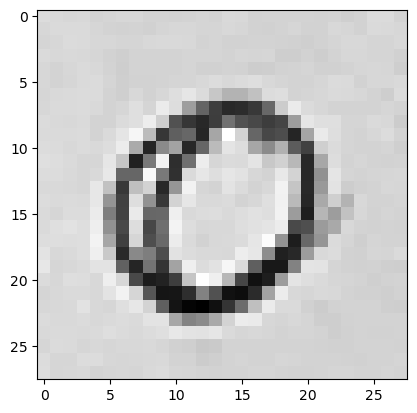

Processing: jason_digits/digit1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
This digit is probably a 8


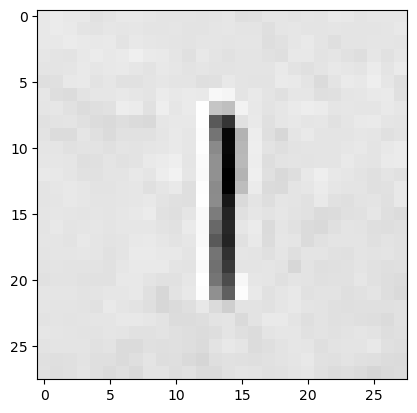

Processing: jason_digits/digit2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
This digit is probably a 2


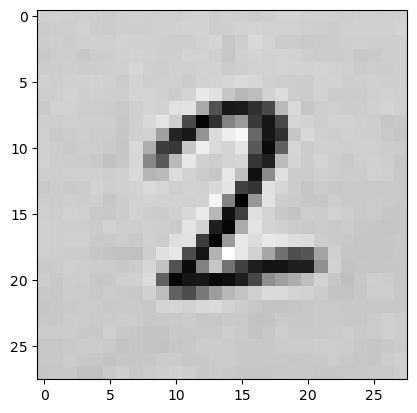

Processing: jason_digits/digit3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This digit is probably a 3


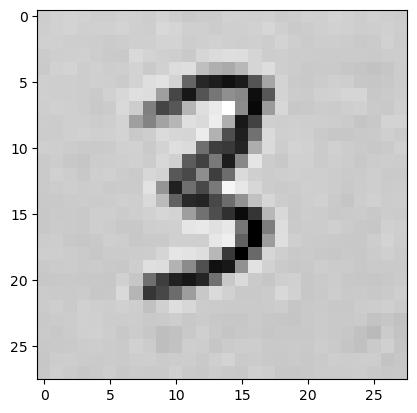

Processing: jason_digits/digit4.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
This digit is probably a 8


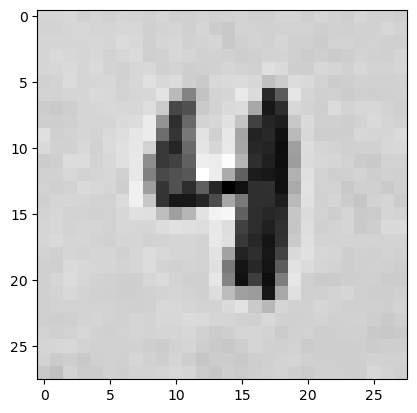

Processing: jason_digits/digit5.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
This digit is probably a 8


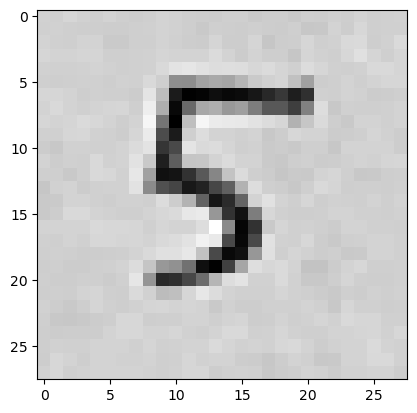

Processing: jason_digits/digit6.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This digit is probably a 6


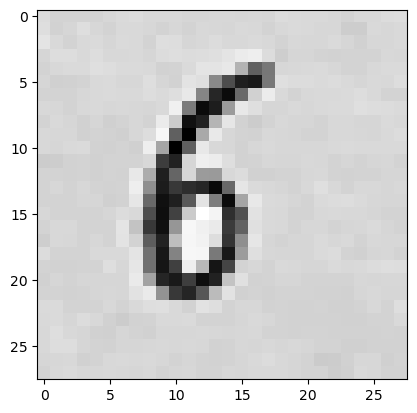

Processing: jason_digits/digit7.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This digit is probably a 8


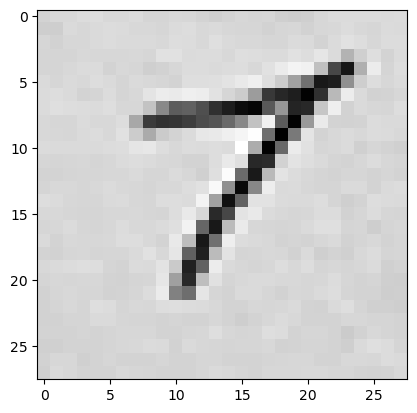

Processing: jason_digits/digit8.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This digit is probably a 8


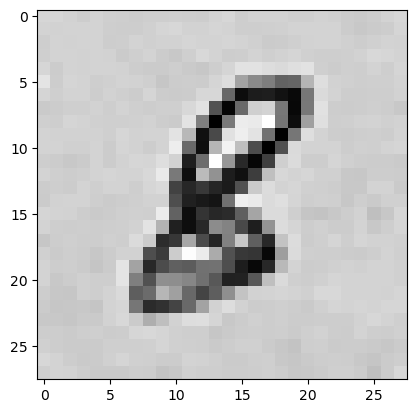

Processing: jason_digits/digit9.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This digit is probably a 9


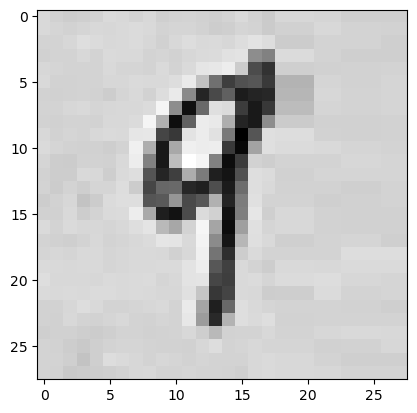

In [59]:
image_number = 1

# Enable interactive mode for matplotlib
plt.ion()

image_number = 0
# folder_name = "digits_samples"
folder_name = "jason_digits"

while os.path.isfile(f"{folder_name}/digit{image_number}.png"):
    try:
        # Debugging statement
        print(f"Processing: {folder_name}/digit{image_number}.png")
        
        img = cv2.imread(f"{folder_name}/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        
        # Ensure the image is correctly read and processed
        if img is not None:
            prediction = model.predict(img)
            print(f"This digit is probably a {np.argmax(prediction)}")
            plt.imshow(img[0], cmap=plt.cm.binary)
            plt.show()
        else:
            print(f"Failed to load image {folder_name}/digit{image_number}.png")
            
    except Exception as e:
        print(f"Error: {e}")
    finally:
        image_number += 1

# Turn off interactive mode
plt.ioff()